<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-equipo157/blob/main/Actividad4_Equipo157.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler 
from sklearn.decomposition import PCA
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
datos = pd.read_csv('https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv')

datos.dropna(axis = 0, inplace = True)
datos['X4'] = datos['X4'].map({0:datos['X4'].mode()[0], 1:1, 2:2, 3:3}) 
datos['X3'] = datos['X3'].map({0:4, 1:1, 2:2, 3:3, 4:4, 5:4, 6:4}) 
print(datos.describe(include = 'all'))

datos_X = datos.drop(['Y', 'ID', 'X2', 'X3','X4'], axis = 1)
datos_Y = datos['Y']

                 ID              X1            X2            X3            X4  \
count  29958.000000    29958.000000  29958.000000  29958.000000  29958.000000   
mean   15005.550504   167555.900928      1.604012      1.842212      1.555344   
std     8654.547473   129737.299088      0.489070      0.744557      0.518115   
min        1.000000    10000.000000      1.000000      1.000000      1.000000   
25%     7516.250000    50000.000000      1.000000      1.000000      1.000000   
50%    15005.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22497.750000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      4.000000      3.000000   

                 X5            X6            X7            X8            X9  \
count  29958.000000  29958.000000  29958.000000  29958.000000  29958.000000   
mean      35.483443     -0.017124     -0.134021     -0.166767     -0.221110   
std        9.214319      1.123989

# 1. Parte 1: Ejercicio guiado
## Paso 1: Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos Utilice la proporción acumulada de la varianza que explican los componentes para determinar la cantidad de varianza que explican los componentes principales.

In [ ]:
print('La varianza de las variables es: ', datos_X.var())
print('La varianza total es: ', sum(datos_X.var()))
print('Porcentaje de varianza explicada', np.round(datos_X.var()/sum(datos_X.var()),4)*100)

La varianza de las variables es:  X1     1.683177e+10
X5     8.490367e+01
X6     1.263351e+00
X7     1.433218e+00
X8     1.430478e+00
X9     1.365202e+00
X10    1.282118e+00
X11    1.320896e+00
X12    5.427998e+09
X13    5.071040e+09
X14    4.814312e+09
X15    4.142813e+09
X16    3.699829e+09
X17    3.550120e+09
X18    2.745259e+08
X19    5.315784e+08
X20    3.103706e+08
X21    2.457434e+08
X22    2.336481e+08
X23    3.164479e+08
dtype: float64
La varianza total es:  45450192701.38759
Porcentaje de varianza explicada X1     37.03
X5      0.00
X6      0.00
X7      0.00
X8      0.00
X9      0.00
X10     0.00
X11     0.00
X12    11.94
X13    11.16
X14    10.59
X15     9.12
X16     8.14
X17     7.81
X18     0.60
X19     1.17
X20     0.68
X21     0.54
X22     0.51
X23     0.70
dtype: float64


<AxesSubplot:>

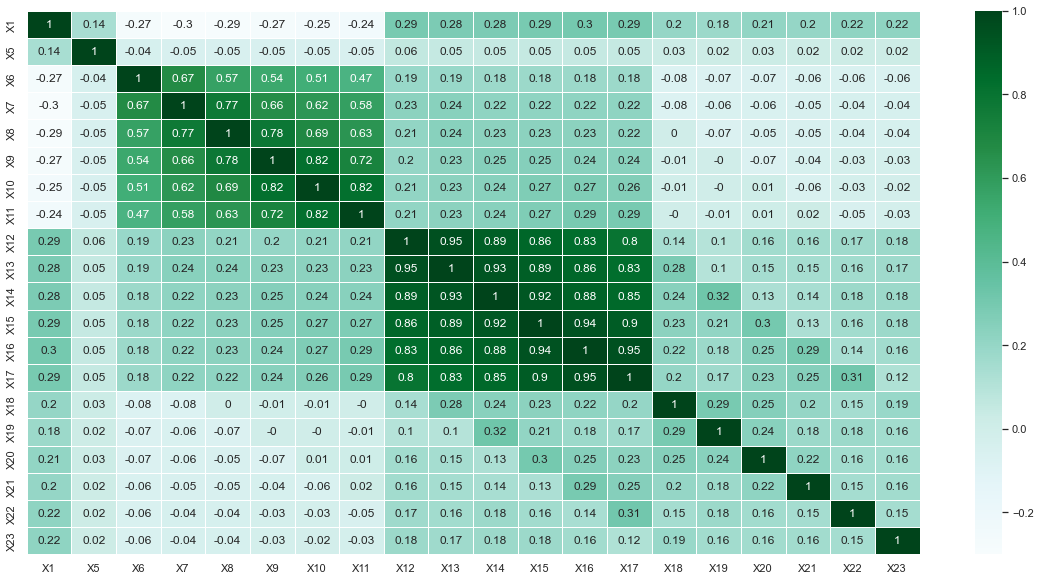

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(datos_X.corr(method = 'pearson').round(2), annot = True, linewidths = 0.5, cmap = 'BuGn')

In [ ]:
# normalizar datos
MinMaxScaler().fit(datos_X).fit_transform(datos_X).shape

(29958, 20)

In [ ]:
pcs = PCA(n_components = 20)
pcs.fit(MinMaxScaler().fit(datos_X).fit_transform(datos_X))

pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                          'Proportion of variance': pcs.explained_variance_ratio_,
                          'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary

,Standard deviation,Proportion of variance,Cumulative proportion
0,0.249104,0.422036,0.422036
1,0.164825,0.184772,0.606808
2,0.145197,0.143386,0.750195
3,0.097183,0.064234,0.814429
4,0.090936,0.056242,0.870670
5,0.073860,0.037103,0.907773
6,0.060238,0.024679,0.932453
7,0.051874,0.018302,0.950754
8,0.042550,0.012314,0.963068
9,0.036701,0.009161,0.972229


In [ ]:
# Tabla de proporción de varianza
pcsSummary = pcsSummary.transpose()
pcsSummary.round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Standard deviation,0.25,0.16,0.15,0.10,0.09,0.07,0.06,0.05,0.04,0.04,0.03,0.03,0.02,0.02,0.02,0.02,0.01,0.01,0.01,0.01
Proportion of variance,0.42,0.18,0.14,0.06,0.06,0.04,0.02,0.02,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Cumulative proportion,0.42,0.61,0.75,0.81,0.87,0.91,0.93,0.95,0.96,0.97,0.98,0.99,0.99,0.99,1.00,1.00,1.00,1.00,1.00,1.00


Respuesta: solo es neceario considerar 5 componentes principales donde se concentra el 90 %

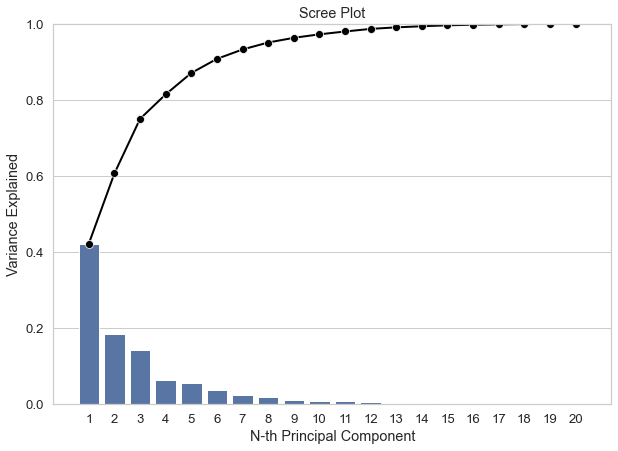

In [ ]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

# Impresión magnitud de varianzas de cada varianza
_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )
# Línea de varianza acumulada
_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

## Paso 2: Interprete cada componente principal en términos de las variables originales
Examine la magnitud y la dirección de los coeficientes de las variables originales. Nota: Cuanto mayor sea el valor absoluto del coeficiente, más importante será la variable correspondiente en el cálculo del componente.

In [ ]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'
                                         , 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20'],
                                index = datos_X.columns
                                )
pcsComponents_df.round(3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
X1,-0.199,0.406,0.531,0.301,-0.644,-0.035,0.026,-0.005,0.004,-0.072,-0.017,-0.025,-0.011,-0.008,-0.007,-0.003,-0.004,0.004,-0.001,-0.001
X5,-0.069,0.810,-0.580,-0.010,0.048,0.003,0.002,-0.000,-0.003,0.005,0.000,0.003,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000
X6,0.327,0.007,-0.053,-0.494,-0.352,-0.642,-0.293,-0.152,-0.029,0.029,0.006,0.011,0.004,0.010,0.001,0.004,-0.000,-0.000,-0.001,-0.000
X7,0.408,0.018,-0.039,-0.337,-0.297,0.252,0.586,0.455,0.111,0.001,-0.030,0.023,-0.012,0.031,-0.020,-0.010,-0.004,-0.002,0.000,-0.003
X8,0.422,0.023,-0.029,-0.035,-0.189,0.563,-0.122,-0.621,-0.256,0.005,-0.007,0.009,0.001,-0.030,0.014,0.026,0.009,-0.004,-0.001,0.005
X9,0.417,0.035,-0.012,0.274,-0.019,0.172,-0.568,0.318,0.541,-0.002,-0.011,0.005,-0.009,0.014,0.037,-0.030,0.003,0.004,0.005,-0.002
X10,0.396,0.040,0.012,0.398,0.099,-0.185,-0.056,0.354,-0.709,-0.007,0.008,-0.003,0.082,-0.020,-0.034,0.009,0.000,0.003,-0.006,-0.001
X11,0.380,0.045,0.023,0.427,0.175,-0.372,0.473,-0.390,0.339,-0.012,0.065,-0.060,-0.050,0.018,0.010,0.007,-0.009,-0.003,0.003,0.000
X12,0.074,0.190,0.278,-0.206,0.239,0.032,-0.014,0.032,0.005,-0.174,0.360,-0.320,0.231,-0.205,0.366,0.086,0.312,-0.421,-0.053,-0.057
X13,0.082,0.199,0.292,-0.204,0.263,0.047,-0.039,-0.007,-0.009,-0.163,0.282,-0.232,0.109,0.266,-0.229,-0.269,-0.222,0.496,0.102,0.284


In [ ]:
print(pcsComponents_df.PC1.abs().idxmax())
print(pcsComponents_df.PC2.abs().idxmax())
print(pcsComponents_df.PC3.abs().idxmax())
print(pcsComponents_df.PC4.abs().idxmax())
print(pcsComponents_df.PC5.abs().idxmax())

X8
X5
X5
X6
X1


In [ ]:
print(pcsComponents_df.PC1.abs().nlargest())
print(pcsComponents_df.PC2.abs().nlargest())
print(pcsComponents_df.PC3.abs().nlargest())
print(pcsComponents_df.PC4.abs().nlargest())
print(pcsComponents_df.PC5.abs().nlargest())

X8     0.421600
X9     0.416537
X7     0.407655
X10    0.396385
X11    0.380328
Name: PC1, dtype: float64
X5     0.809858
X1     0.405848
X13    0.199373
X12    0.190353
X15    0.180637
Name: PC2, dtype: float64
X5     0.580381
X1     0.530537
X13    0.291769
X12    0.277765
X15    0.266263
Name: PC3, dtype: float64
X6     0.493709
X11    0.426682
X10    0.398052
X7     0.336542
X1     0.301183
Name: PC4, dtype: float64
X1     0.644335
X6     0.351782
X7     0.297301
X13    0.262858
X15    0.242970
Name: PC5, dtype: float64


## Paso 3: Identifique valores atípicos
Realice alguna gráfica de valores atípicos o boxplot para identificar los valores atípicos. Cualquier punto que esté más alejado de la línea de referencia es un valor atípico

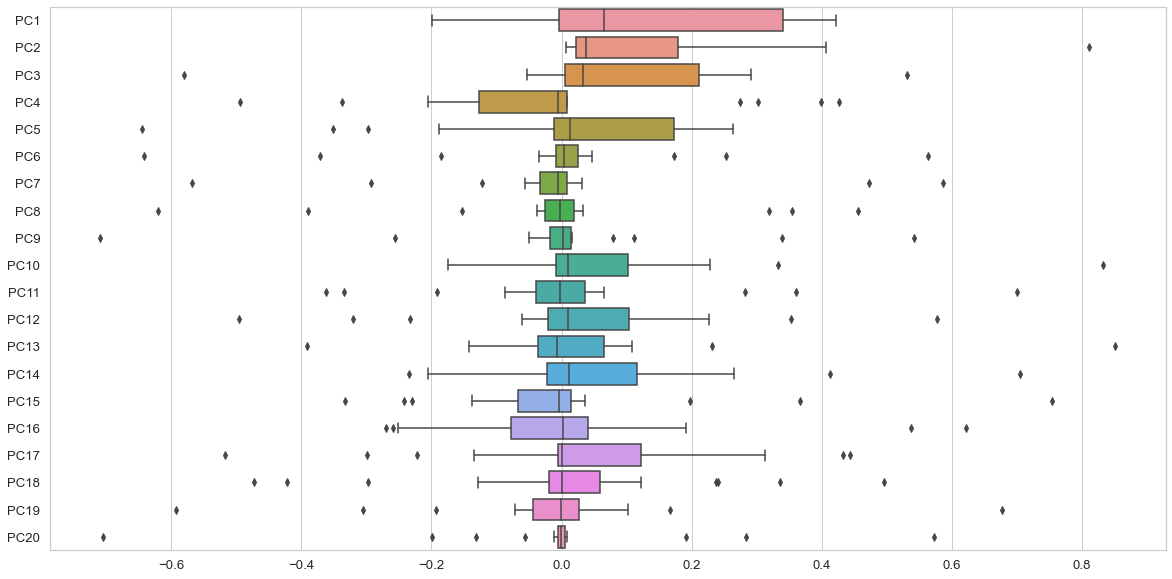

In [ ]:
sns.boxplot(data = pcsComponents_df, orient="h")
plt.show()

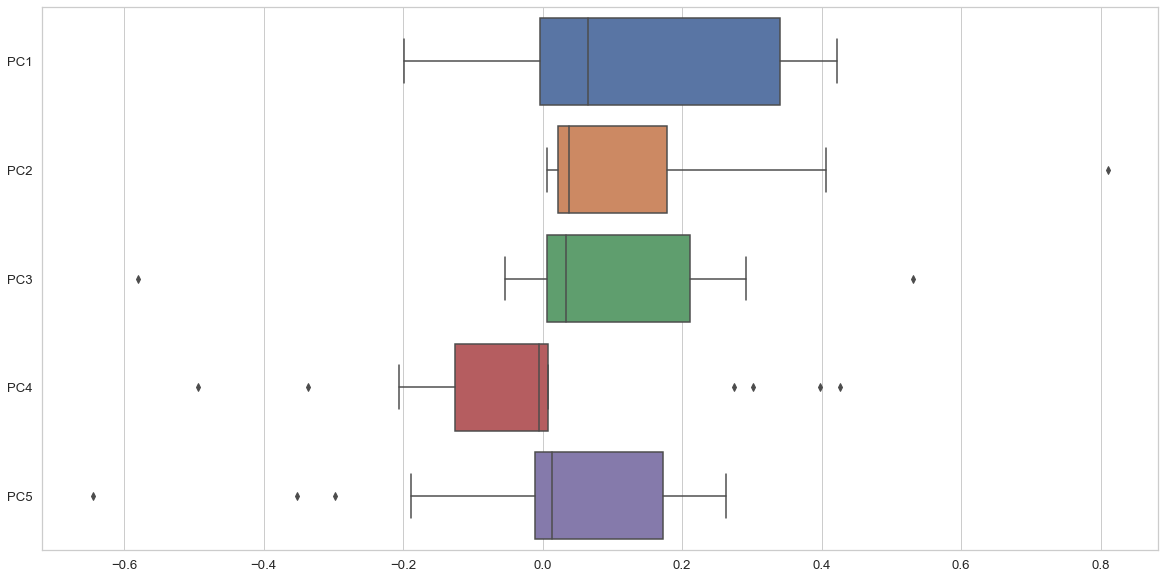

In [ ]:
sns.boxplot(data = pcsComponents_df.loc[:,'PC1':'PC5'], orient="h")
plt.show()

# 1. Parte 2: Responde las siguientes preguntas en una celda de texto en Jupyter Notebook

- ¿Cuál es el número de componentes mínimo y por qué? \
  *Respuesta:* El número de componentes mínimo se decidio que fueran 5 dado que ahí recoge el 90% de la variabilidad de los datos analizados.

- ¿Cuál es la variación de los datos que representan esos componentes? \
  *Respuesta:* El primer componente aporta con el 42% de la variabilidad o de la información. El segundo representa el 18%, el tercero el 14%, el cuarto el 6% y finalmente quinto con el 4%.

- ¿Cuál es la pérdida de información después de realizar PCA? \
  *Respuesta:* Considerando los 5 componentes se pierde solo el 10% de la información.

- De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales? \
  *Respuesta:* De las 5 componentes principales estan fueron las más y la menos importante: \
  + PC1: X8 y X11
  + PC2: X5 y X15
  + PC3: X5 y X15
  + PC4: X6 y X1
  + PC5: X1 y X15.

- ¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning? \
  *Respuesta:* Cuando el número de variables es alto y el dataset tiene variables variables correlacionadas, con esto recogemos la mayor cantidad de información en un menor numero de variables haciendo robusto el análisis.